In [580]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [581]:
df=pd.read_csv('sonar.csv',names=range(0,61))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [582]:
df.shape


(208, 61)

In [583]:
x=df.iloc[:,0:-1]
x.shape

(208, 60)

In [584]:
y=df.iloc[:,-1]
y.shape

(208,)

In [585]:
from sklearn.decomposition import PCA

In [586]:
pca=PCA(n_components=10)

In [587]:
x=pca.fit_transform(x)

In [588]:
x.shape

(208, 10)

In [589]:
xd=pd.DataFrame(data=x)
xd

,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277
...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120


In [590]:
from sklearn.preprocessing import LabelEncoder

In [591]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [592]:
import seaborn as sns

In [593]:
xd.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [594]:
xd.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [595]:
yd=pd.DataFrame(data=y)
yd.nunique()

0    2
dtype: int64

In [596]:
from scipy.stats import zscore

In [597]:
z_score=abs(zscore(xd))
print(xd.shape)
dffinal=xd.loc[(z_score<3).all(axis=1)]
print(dffinal.shape)

(208, 10)
(205, 10)


In [598]:
xd.skew()

0    0.177056
1    0.403361
2    0.179856
3    0.437246
4   -0.081498
5    0.260802
6    0.407128
7    0.058413
8   -0.223131
9   -0.266651
dtype: float64

In [600]:
re=pd.concat([xd,yd],axis=1,sort=False)
re

,0,1,2,3,4,5,6,7,8,9,0
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054,1
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529,1
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559,1
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795,1
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277,1
...,...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179,0
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296,0
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044,0
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120,0


In [601]:
dco=re.corr()
dco

,0,1,2,3,4,5,6,7,8,9,0
0,1.000000e+00,-7.700012e-17,-1.026911e-16,-7.708231e-17,6.884435e-17,-1.436210e-17,6.357354e-17,-7.363028e-17,7.798568e-17,9.480208e-18,0.156212
1,-7.700012e-17,1.000000e+00,1.263383e-16,-3.979354e-16,1.824302e-16,-1.510946e-16,-9.722100e-17,-9.345835e-17,2.019524e-16,-2.573771e-17,0.042275
2,-1.026911e-16,1.263383e-16,1.000000e+00,5.571291e-16,9.588228e-17,7.595980e-17,-1.416048e-17,7.748150e-17,1.567201e-16,-2.011419e-17,-0.005134
3,-7.708231e-17,-3.979354e-16,5.571291e-16,1.000000e+00,-3.797066e-16,-8.198772e-17,4.541745e-17,1.039148e-16,-1.122984e-16,6.300178e-17,-0.438379
4,6.884435e-17,1.824302e-16,9.588228e-17,-3.797066e-16,1.000000e+00,-1.583340e-16,-1.737439e-16,8.702697e-17,1.889555e-16,9.108142e-17,0.336482
5,-1.436210e-17,-1.510946e-16,7.595980e-17,-8.198772e-17,-1.583340e-16,1.000000e+00,-6.101752e-16,-6.344164e-17,1.608012e-16,-1.377700e-16,0.061745
6,6.357354e-17,-9.722100e-17,-1.416048e-17,4.541745e-17,-1.737439e-16,-6.101752e-16,1.000000e+00,-1.743952e-16,-9.719295e-17,6.743776e-19,-0.130570
7,-7.363028e-17,-9.345835e-17,7.748150e-17,1.039148e-16,8.702697e-17,-6.344164e-17,-1.743952e-16,1.000000e+00,-7.903711e-16,1.404604e-16,-0.034167
8,7.798568e-17,2.019524e-16,1.567201e-16,-1.122984e-16,1.889555e-16,1.608012e-16,-9.719295e-17,-7.903711e-16,1.000000e+00,-6.947532e-17,0.055580
9,9.480208e-18,-2.573771e-17,-2.011419e-17,6.300178e-17,9.108142e-17,-1.377700e-16,6.743776e-19,1.404604e-16,-6.947532e-17,1.000000e+00,-0.019284


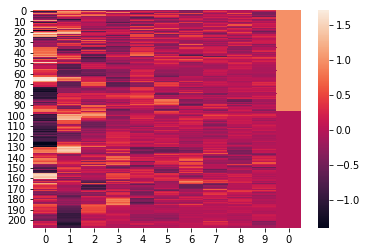

In [602]:
sns.heatmap(re)

In [603]:
from sklearn.preprocessing import StandardScaler

In [604]:
scale=StandardScaler()

In [605]:
xd=scale.fit_transform(xd)

In [606]:
xd

array([[ 0.77248548,  0.53637412, -1.00388427, ...,  0.34967873,
        -0.12361526,  1.73948998],
       [-1.30157293,  1.70964933,  2.16218874, ...,  1.80184747,
        -0.02045941, -0.39667238],
       [-0.4369833 ,  1.46810656,  0.63768818, ...,  0.35196184,
        -0.05511404, -2.39855363],
       ...,
       [ 0.39923188, -1.9343817 ,  0.64826473, ...,  1.0556106 ,
         0.36621476, -1.71208812],
       [-0.06136088, -1.67258649,  0.51757656, ...,  0.31515471,
         0.13084289, -0.93588241],
       [-0.06853978, -1.5324556 ,  0.02309443, ..., -0.09751457,
        -0.60414087, -0.78829398]])

In [607]:
xdd=pd.DataFrame(xd)
xdd

,0,1,2,3,4,5,6,7,8,9
0,0.772485,0.536374,-1.003884,-1.127681,-0.813348,-0.561474,-1.580997,0.349679,-0.123615,1.739490
1,-1.301573,1.709649,2.162189,0.320467,0.954444,0.642118,-0.962237,1.801847,-0.020459,-0.396672
2,-0.436983,1.468107,0.637688,2.574604,0.230577,-1.081070,-1.525816,0.351962,-0.055114,-2.398554
3,1.142499,1.160203,-0.034708,-0.328919,-1.848530,1.430135,1.820632,-1.030172,2.726452,-2.388903
4,-0.086831,0.374442,1.655298,0.418939,0.453263,0.190032,-1.428795,0.310971,-0.594057,-2.293097
...,...,...,...,...,...,...,...,...,...,...
203,0.056025,-1.732496,0.688633,0.064186,-0.051512,0.349671,0.013986,0.831421,-0.141691,-1.444840
204,0.293858,-1.937652,0.527795,0.136739,0.611466,0.045891,0.290176,1.237511,0.359205,-1.658774
205,0.399232,-1.934382,0.648265,-0.172138,0.545721,0.054893,0.169254,1.055611,0.366215,-1.712088
206,-0.061361,-1.672586,0.517577,-0.198430,-0.491206,-0.304020,0.114722,0.315155,0.130843,-0.935882


In [608]:
xtrain,xtest,ytrain,ytest=train_test_split(xdd,yd,test_size=.22,random_state=45)

In [609]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

In [610]:
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    predm=m.predict(xtest)
    print('accuracy score of ',m,'is',accuracy_score(ytest,predm))
    print(confusion_matrix(ytest,predm))
    print(classification_report(ytest,predm))
    print('\n')

C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is 0.8043478260869565
[[20  1]
 [ 8 17]]
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        21
           1       0.94      0.68      0.79        25

    accuracy                           0.80        46
   macro avg       0.83      0.82      0.80        46
weighted avg       0.84      0.80      0.80        46



accuracy score of  GaussianNB(priors=None, var_smoothing=1e-09) is 0.8260869565217391
[[20  1]
 [ 7 18]]


C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.74      0.95      0.83        21
           1       0.95      0.72      0.82        25

    accuracy                           0.83        46
   macro avg       0.84      0.84      0.83        46
weighted avg       0.85      0.83      0.83        46



accuracy score of  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 0.8913043478260869
[[21  0]
 [ 5 20]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        21
           1       1.00      0.80      0.89        25

    accuracy                           0.89        46
   macro avg       0.90      0.90      0.89        46
weighted avg       0.91      0.89      0.89        46



accuracy score of  DecisionTreeC

In [611]:
from sklearn.model_selection import cross_val_score

In [612]:
lr=LogisticRegression()
lrscores=cross_val_score(lr,xd,yd,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.45238095 0.9047619  0.61904762 0.90243902 0.46341463]
0.6684088269454123 0.20087812286294673


C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [613]:
gnb=GaussianNB()
gnbscores=cross_val_score(gnb,xd,yd,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[0.47619048 0.73809524 0.42857143 0.70731707 0.36585366]
0.543205574912892 0.1509968727373656


In [614]:
svc=SVC()
svcscores=cross_val_score(svc,xd,yd,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.47619048 0.69047619 0.54761905 0.75609756 0.36585366]
0.5672473867595819 0.14148200789797596


C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [615]:
dtc=DecisionTreeClassifier()
dtcscores=cross_val_score(dtc,xd,yd,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.33333333 0.57142857 0.4047619  0.58536585 0.29268293]
0.4375145180023228 0.12057830142708417


In [616]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [617]:
lr.fit(xtrain,ytrain)
predlr=lr.predict(xtest)
y_pred_prob=lr.predict_proba(xtest)[:,1]
print(y_pred_prob)

[0.16758144 0.32251706 0.24861805 0.0790832  0.65413736 0.31160902
 0.92184471 0.17635149 0.85343126 0.26104095 0.36520696 0.19097827
 0.03945392 0.49085925 0.6157646  0.64758394 0.93330881 0.21717618
 0.34803631 0.3278064  0.51488055 0.7478226  0.80131599 0.27054884
 0.14335419 0.72923316 0.94893691 0.85751677 0.36378074 0.19564934
 0.03700692 0.00595531 0.15304258 0.09908707 0.40958225 0.91681071
 0.91785519 0.28704204 0.33200084 0.91923629 0.04218018 0.95535293
 0.80330392 0.81678561 0.26572812 0.10460194]


C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [618]:
fpr,tpr,thresholds=roc_curve(ytest,y_pred_prob)


In [619]:
fpr

array([0.        , 0.        , 0.        , 0.04761905, 0.04761905,
       0.0952381 , 0.0952381 , 0.19047619, 0.19047619, 0.38095238,
       0.38095238, 0.71428571, 0.71428571, 0.85714286, 0.85714286,
       1.        ])

In [620]:
tpr

array([0.  , 0.04, 0.68, 0.68, 0.76, 0.76, 0.8 , 0.8 , 0.88, 0.88, 0.92,
       0.92, 0.96, 0.96, 1.  , 1.  ])

In [621]:
thresholds

array([1.95535293, 0.95535293, 0.6157646 , 0.51488055, 0.40958225,
       0.36520696, 0.36378074, 0.33200084, 0.32251706, 0.26572812,
       0.26104095, 0.15304258, 0.14335419, 0.0790832 , 0.04218018,
       0.00595531])

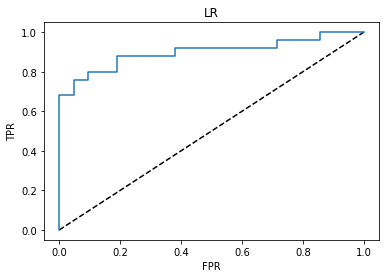

In [622]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LR')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('LR')
plt.show()

In [623]:
auc_score=roc_auc_score(ytest,lr.predict(xtest))
auc_score

0.8161904761904762

In [624]:
gnb.fit(xtrain,ytrain)
predgnb=gnb.predict(xtest)
y_pred_prob=gnb.predict_proba(xtest)[:,1]
print(y_pred_prob)

[0.21843273 0.56531122 0.31412713 0.14809847 0.6304789  0.27186282
 0.84487653 0.22201684 0.73622822 0.41060121 0.36487609 0.44978687
 0.15830571 0.43435031 0.47985842 0.63982501 0.85723968 0.2117992
 0.35504923 0.28812632 0.51170602 0.96067024 0.79622207 0.2600509
 0.55369506 0.69544369 0.83190129 0.82141368 0.46987956 0.18841761
 0.14544487 0.0363605  0.22367249 0.20093195 0.23275225 0.73757998
 0.91546053 0.30536419 0.22921342 0.88421366 0.01325755 0.76039781
 0.65044269 0.69814082 0.28053571 0.22172192]


C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [625]:
fpr,tpr,thresholds=roc_curve(ytest,y_pred_prob)

In [626]:
fpr

array([0.        , 0.        , 0.        , 0.04761905, 0.04761905,
       0.0952381 , 0.0952381 , 0.28571429, 0.28571429, 0.42857143,
       0.42857143, 1.        , 1.        ])

In [627]:
tpr

array([0.  , 0.04, 0.72, 0.72, 0.8 , 0.8 , 0.88, 0.88, 0.92, 0.92, 0.96,
       0.96, 1.  ])

In [628]:
thresholds

array([1.96067024, 0.96067024, 0.55369506, 0.51170602, 0.46987956,
       0.44978687, 0.41060121, 0.30536419, 0.28812632, 0.2600509 ,
       0.23275225, 0.0363605 , 0.01325755])

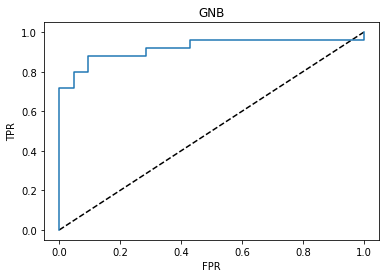

0.8361904761904762

In [629]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GNB')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('GNB')
plt.show()
auc_score=roc_auc_score(ytest,gnb.predict(xtest))
auc_score

In [630]:
svc=SVC(probability=True)
svc.fit(xtrain,ytrain)
predsvc=svc.predict(xtest)
y_pred_prob=svc.predict_proba(xtest)[:,1]
print(y_pred_prob)

[0.13429763 0.72687306 0.11841969 0.02778865 0.82127986 0.07177104
 0.98429219 0.08817426 0.98486495 0.48593475 0.18771227 0.11597736
 0.03704869 0.36085919 0.76686437 0.88119868 0.91121574 0.07003623
 0.13895245 0.1985526  0.26542352 0.95371137 0.92926129 0.18932507
 0.75355412 0.79531335 0.79960473 0.93086195 0.35363999 0.09765439
 0.12995382 0.02729903 0.05407148 0.03730655 0.77276215 0.92840462
 0.96234911 0.35399736 0.12220104 0.94454752 0.351814   0.93328071
 0.78915291 0.81176126 0.07995582 0.07079777]


C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [631]:
fpr,tpr,thresholds=roc_curve(ytest,y_pred_prob)

In [632]:
fpr

array([0.        , 0.        , 0.        , 0.04761905, 0.04761905,
       0.0952381 , 0.0952381 , 1.        ])

In [633]:
tpr

array([0.  , 0.04, 0.88, 0.88, 0.96, 0.96, 1.  , 1.  ])

In [634]:
thresholds

array([1.98486495, 0.98486495, 0.36085919, 0.35399736, 0.351814  ,
       0.26542352, 0.1985526 , 0.02729903])

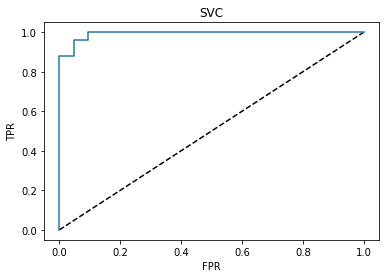

0.9

In [635]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('SVC')
plt.show()
auc_score=roc_auc_score(ytest,svc.predict(xtest))
auc_score

In [636]:
dtc.fit(xtrain,ytrain)
predsvc=dtc.predict(xtest)
y_pred_prob=dtc.predict_proba(xtest)[:,1]
print(y_pred_prob)

[0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0.]


In [637]:
fpr,tpr,thresholds=roc_curve(ytest,y_pred_prob)

In [638]:
fpr

array([0.        , 0.23809524, 1.        ])

In [639]:
tpr

array([0.  , 0.56, 1.  ])

In [640]:
thresholds

array([2., 1., 0.])

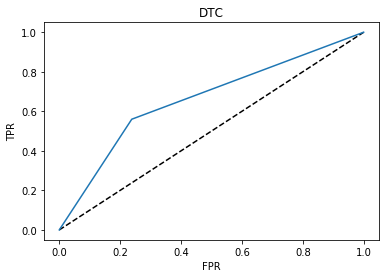

0.660952380952381

In [641]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DTC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('DTC')
plt.show()
auc_score=roc_auc_score(ytest,dtc.predict(xtest))
auc_score

In [642]:
from sklearn.externals import joblib
joblib.dump(svc,'svcfile.obj')
svc_from_joblib=joblib.load('svcfile.obj')
svc_from_joblib.predict(xtest)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0])